In [1]:
"""
The first step to Keras

This is modified version of the tutorial code in the Book "Deep Learning with Python"
Copyright 2017 by Manning Publications, Co.
https://github.com/fchollet/deep-learning-with-python-notebooks
Copyright: Copyright (c) 2017 François Chollet
"""
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


Using TensorFlow backend.


2113536/2110848 [==============================] - 17s 8us/step


In [5]:
len(train_data)

8982

In [7]:
len(test_data)

2246

In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
## convert news sample to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 3s 6us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension), dtype='uint16')
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
one_hot_train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
## define the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
## train the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 742us/step - loss: 2.5288 - acc: 0.4965 - val_loss: 1.7252 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 3s 385us/step - loss: 1.4507 - acc: 0.6878 - val_loss: 1.3507 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 3s 424us/step - loss: 1.1011 - acc: 0.7638 - val_loss: 1.1730 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 3s 355us/step - loss: 0.8737 - acc: 0.8150 - val_loss: 1.0861 - val_acc: 0.7550
Epoch 5/20
7982/7982 [==============================] - 3s 356us/step - loss: 0.7064 - acc: 0.8472 - val_loss: 0.9859 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 311us/step - loss: 0.5690 - acc: 0.8789 - val_loss: 0.9435 - val_acc: 0.8010
Epoch 7/20
7982/7982 [==============================] - 3s 369us/step - loss: 0.4619 - acc: 0.9035 - val_loss: 0.9114 - val_acc: 0.8040


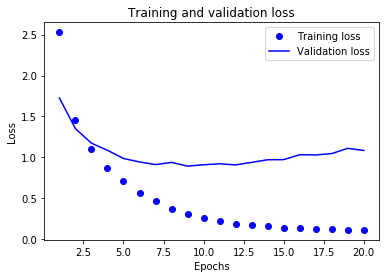

In [26]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

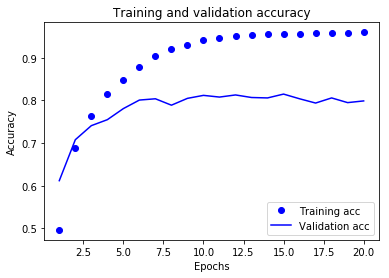

In [27]:
plt.clf()

accs = history.history['acc']
val_accs = history.history['val_acc']

plt.plot(epochs, accs, 'bo', label='Training acc')
plt.plot(epochs, val_accs, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
##  test 2
##  change epochs from 20 to 8
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,    # change epochs 20 to 8
                    batch_size=512,
                    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 4s 492us/step - loss: 2.5313 - acc: 0.5242 - val_loss: 1.6846 - val_acc: 0.6530
Epoch 2/8
7982/7982 [==============================] - 2s 306us/step - loss: 1.3753 - acc: 0.7135 - val_loss: 1.2791 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 3s 317us/step - loss: 1.0163 - acc: 0.7799 - val_loss: 1.1372 - val_acc: 0.7470
Epoch 4/8
7982/7982 [==============================] - 3s 320us/step - loss: 0.8017 - acc: 0.8256 - val_loss: 1.0587 - val_acc: 0.7570
Epoch 5/8
7982/7982 [==============================] - 3s 376us/step - loss: 0.6446 - acc: 0.8619 - val_loss: 0.9797 - val_acc: 0.7950
Epoch 6/8
7982/7982 [==============================] - 3s 318us/step - loss: 0.5176 - acc: 0.8908 - val_loss: 0.9136 - val_acc: 0.8110
Epoch 7/8
7982/7982 [==============================] - 3s 352us/step - loss: 0.4182 - acc: 0.9132 - val_loss: 0.8971 - val_acc: 0.8200
Epoch 8

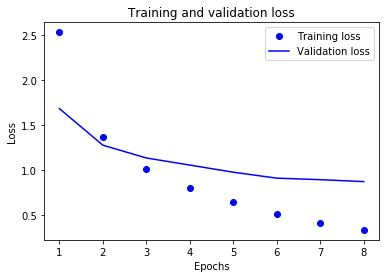

In [30]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
##  test 3
##  change units from 64 to 128
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 529us/step - loss: 2.4626 - acc: 0.5481 - val_loss: 1.6050 - val_acc: 0.6600
Epoch 2/20
7982/7982 [==============================] - 3s 323us/step - loss: 1.3226 - acc: 0.7211 - val_loss: 1.2872 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 240us/step - loss: 0.9959 - acc: 0.7894 - val_loss: 1.0818 - val_acc: 0.7720
Epoch 4/20
7982/7982 [==============================] - 3s 329us/step - loss: 0.7779 - acc: 0.8355 - val_loss: 0.9884 - val_acc: 0.7980
Epoch 5/20
7982/7982 [==============================] - 3s 325us/step - loss: 0.6142 - acc: 0.8697 - val_loss: 0.9303 - val_acc: 0.8130
Epoch 6/20
7982/7982 [==============================] - 3s 336us/step - loss: 0.4779 - acc: 0.8995 - val_loss: 0.9403 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 2s 277us/step - loss: 0.3791 - acc: 0.9194 - val_loss: 0.8781 - val_acc: 0.8190


[1.2048019322559225, 0.790293855743544]

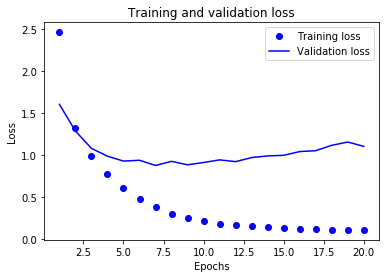

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

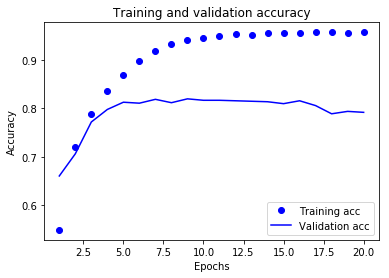

In [34]:
plt.clf()

accs = history.history['acc']
val_accs = history.history['val_acc']

plt.plot(epochs, accs, 'bo', label='Training acc')
plt.plot(epochs, val_accs, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
##  test 4
##  change hidden layers from 1 to 2
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 474us/step - loss: 2.5307 - acc: 0.4640 - val_loss: 1.6680 - val_acc: 0.6040
Epoch 2/20
7982/7982 [==============================] - 3s 324us/step - loss: 1.4055 - acc: 0.6938 - val_loss: 1.2988 - val_acc: 0.7110
Epoch 3/20
7982/7982 [==============================] - 2s 267us/step - loss: 1.0792 - acc: 0.7635 - val_loss: 1.1419 - val_acc: 0.7540
Epoch 4/20
7982/7982 [==============================] - 2s 242us/step - loss: 0.8457 - acc: 0.8165 - val_loss: 1.0453 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 2s 247us/step - loss: 0.6732 - acc: 0.8509 - val_loss: 1.0148 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 2s 248us/step - loss: 0.5314 - acc: 0.8849 - val_loss: 0.9635 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 2s 284us/step - loss: 0.4231 - acc: 0.9080 - val_loss: 0.9457 - val_acc: 0.8010


[1.4303253834946072, 0.7551202137663443]

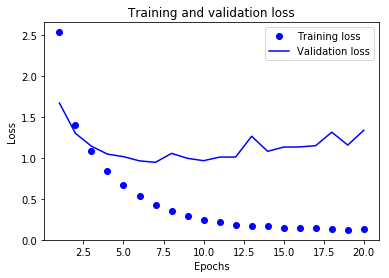

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

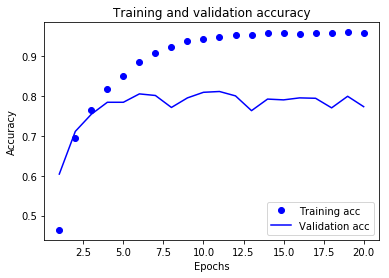

In [37]:
plt.clf()

accs = history.history['acc']
val_accs = history.history['val_acc']

plt.plot(epochs, accs, 'bo', label='Training acc')
plt.plot(epochs, val_accs, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()